In [1]:
#import libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#no macbook
#all_data = pd.read_csv("/Users/administrador/Documents/Codeacademy/Life-Expectancy-and-GDP-Starter/all_data.csv")

#no windows
all_data = pd.read_csv("F:/Codecademy/Exercises/Life-Expectancy-and-GDP-Starter/all_data.csv")

all_data.describe()
all_data.info()
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#rename the column to better understand and work
all_data.rename(columns= {"Life expectancy at birth (years)" : "Expectancy"}, inplace=True)
print(all_data.columns)

Index(['Country', 'Year', 'Expectancy', 'GDP'], dtype='object')


In [4]:
#what countries are in dataframe?
country = all_data.groupby("Country")
for key, value in country:
    print(key)

Chile
China
Germany
Mexico
United States of America
Zimbabwe


In [5]:
#what the range of years in data?
print("The min year is: ", np.min((all_data.Year)))
print("The max year is: ", np.max((all_data.Year)))

The min year is:  2000
The max year is:  2015


In [6]:
#about all countries GPD
print("GDP average of all countries: $", np.mean((all_data.GDP)))
print("GDP median of all countries: $", np.median((all_data.GDP)))
print("GDP min of all countries: $", np.min((all_data.GDP)))
print("GDP max of all countries: $", np.max((all_data.GDP)))

GDP average of all countries: $ 3880498570768.396
GDP median of all countries: $ 1280220000000.0
GDP min of all countries: $ 4415702800.0
GDP max of all countries: $ 18100000000000.0


Vamos anaisar a expectativa de vida de cada país ao longo do tempo

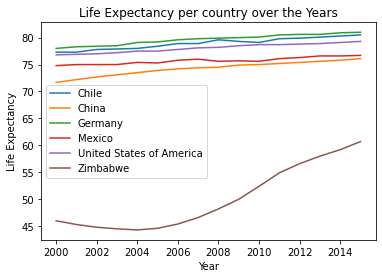

In [7]:
for nation in all_data["Country"].unique():
    plt.plot(all_data[all_data["Country"] == nation]["Year"], all_data[all_data["Country"] == nation]["Expectancy"], label = nation)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy per country over the Years")
plt.legend()
plt.show()

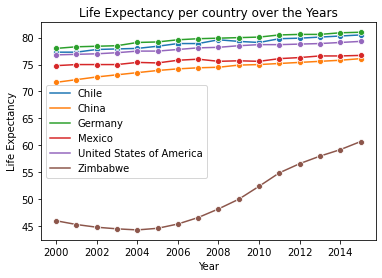

In [47]:
#outra maneira de fazer isso
plt.clf()
sns.lineplot(x = "Year", y = "Expectancy", hue = "Country", data = all_data, marker = "o")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy per country over the Years")
plt.legend()
plt.show()

Vamos observar o desenvolvimento da expectativa de vida em cada país, durante os anos de maineira visual

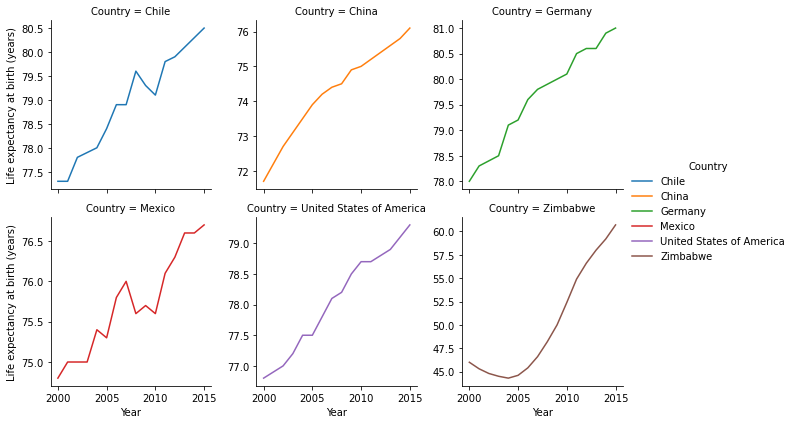

In [50]:
Expectancy_facegrid = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

Expectancy_facegrid = (Expectancy_facegrid.map(sns.lineplot, "Year", "Expectancy")
                  .add_legend()
                  .set_axis_labels("Year","Life expectancy at birth (years)"))

Expectancy_facegrid;

• All countries have increased it Life Expectancy at Birth over the Years.
• Germany have the highest Life Expectancy of all countries. It started higher than other countries too (78) and reached 81.
• Chile, México and Zimbabwe has highs and lows in th period observed. But all increased it Live Expectancy.
• After 2015, Zimbabwe increased 15 points, from 45 to 60, in Life Expectancy.
• Mexico respond for the least Life Exectancy increase over the years (74.5 - 76.5)

**Let's take a look in GDP over years**

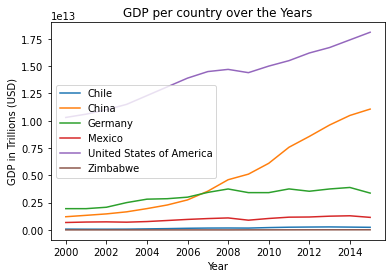

In [10]:
plt.clf()
sns.lineplot(x = "Year", y = "GDP", hue = "Country", data = all_data)
plt.xlabel("Year")
plt.ylabel("GDP in Trillions (USD)")
plt.title("GDP per country over the Years", loc="center")
plt.legend()
plt.show()

• China has the most sustained growth over the years
• USA have the higher GPD
• Other countries didn't growth so much, Germany and Mexico felt in GDP

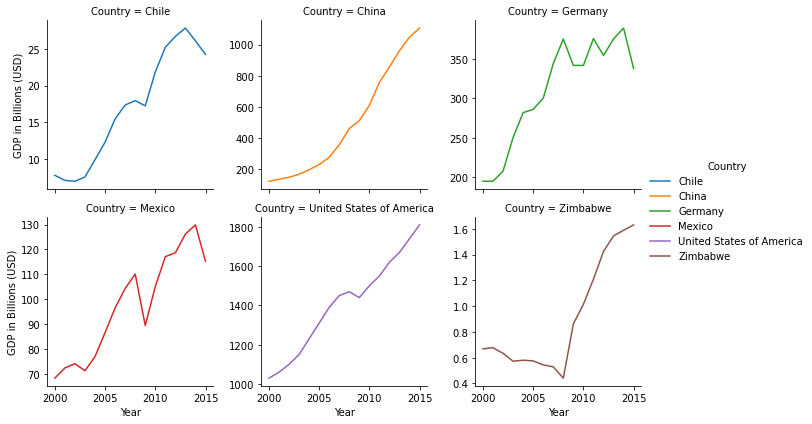

In [44]:
GDP_facegrid = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

#transform trillions in billions
GDP_facegrid = (GDP_facegrid.map(sns.lineplot, "Year", y=all_data.GDP*1e-10)
                  .add_legend()
                  .set_axis_labels("Year","GDP in Billions (USD)"))

GDP_facegrid;

• 2008 crisis didn't affected Zimbabwe's GDP
•  Germany had difficult to sustain the growth, with consecutives highes ands lowes after 2008


**It's a Relation between GDP and Life Expectancy?**


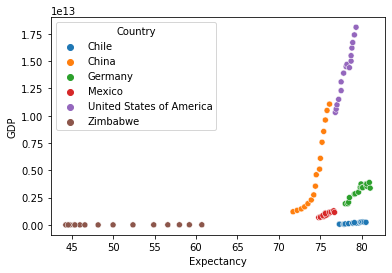

In [12]:
plt.clf()

sns.scatterplot(
    x = "Expectancy",
    y = "GDP",
    hue = "Country",
    data = all_data
)
plt.show()


<Figure size 432x288 with 0 Axes>

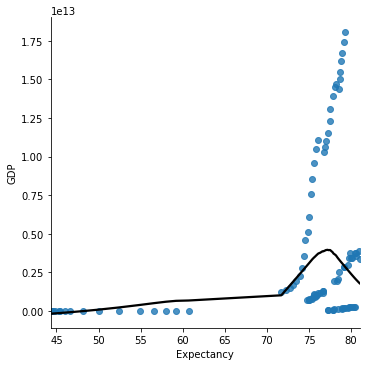

In [13]:
plt.clf()

sns.lmplot(
    x = "Expectancy", y = "GDP", 
    data = all_data,
    line_kws={"color":"black"}, 
    lowess=True
        )
plt.show()

• 

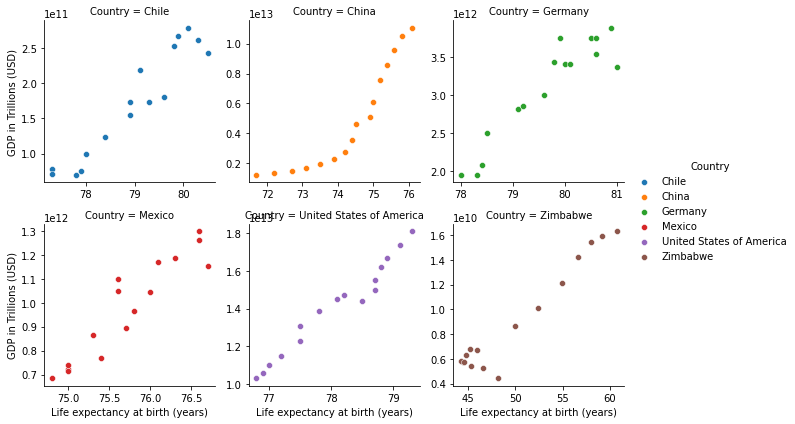

In [15]:
Expectancy_GDP = sns.FacetGrid(all_data, col="Country", col_wrap=3, hue ="Country",  sharey = False, sharex = False)
Expectancy_GDP = (Expectancy_GDP.map(sns.scatterplot, "Expectancy", "GDP").add_legend()
             .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions (USD)"));
Expectancy_GDP



• Yes, there is a positive correlation in GDP and Life Expectancy on observed countries

In [16]:
#let´s look inside that

all_data["Expectancy"].describe()

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Expectancy, dtype: float64

The mean o Expectancy is 72.789583

In [17]:
#for each country
all_data.groupby("Country")["Expectancy"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Chile,16.0,78.94375,1.058911,77.3,77.975,79.00,79.825,80.5
China,16.0,74.26250,1.318016,71.7,73.400,74.45,75.250,76.1
Germany,16.0,79.65625,0.975000,78.0,78.950,79.85,80.525,81.0
Mexico,16.0,75.71875,0.620987,74.8,75.225,75.65,76.150,76.7
United States of America,16.0,78.06250,0.832566,76.8,77.425,78.15,78.725,79.3
Zimbabwe,16.0,50.09375,5.940311,44.3,45.175,47.40,55.325,60.7


• Zimbabwe has the lowest mean
• Zimbabwe has the highest std, 5x of China's std

c:\Users\ccana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


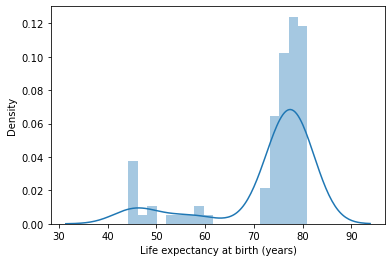

In [18]:
#the distribution

plt.clf()
sns.distplot(all_data.Expectancy)
plt.xlabel("Life expectancy at birth (years)");
plt.show()

The distribution is skewed. Let´s check each country.

<Figure size 432x288 with 0 Axes>

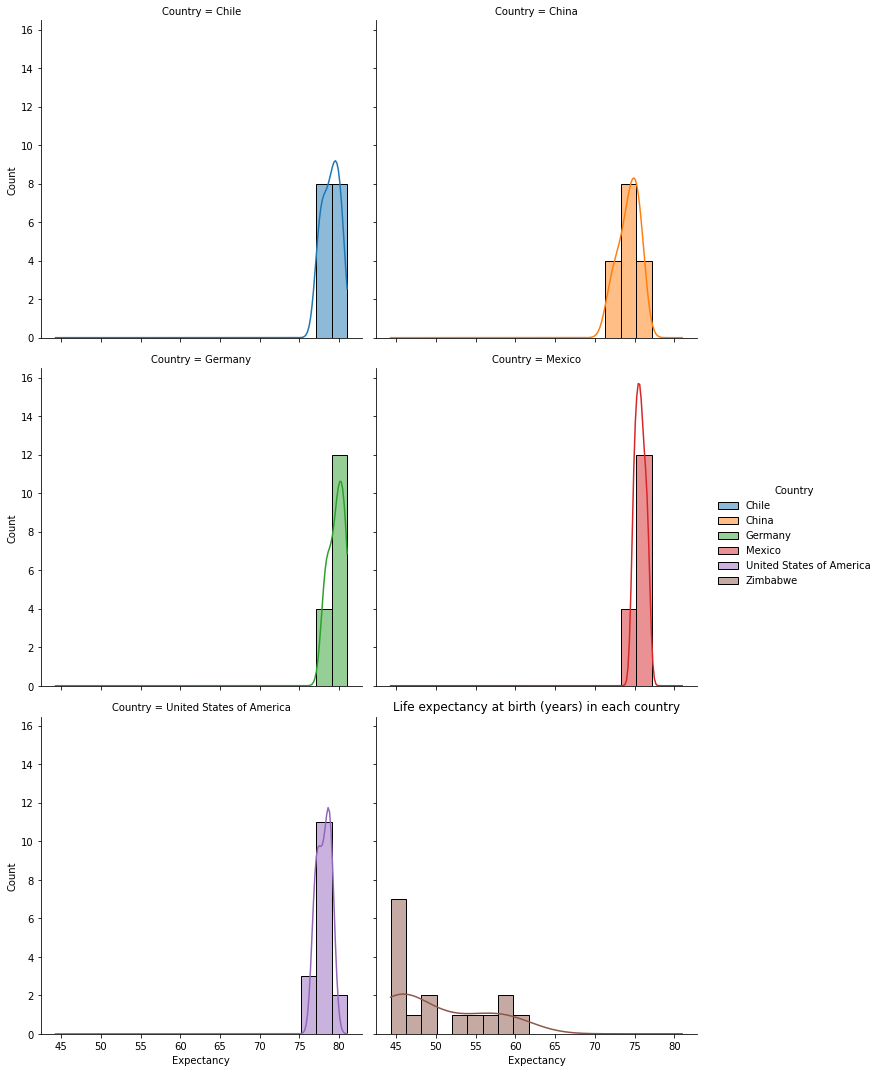

In [58]:
plt.clf()
sns.displot(data=all_data, x= "Expectancy", col="Country", col_wrap=2, kde=True, hue="Country")
plt.title("Life expectancy at birth (years) in each country")
plt.show()

<Figure size 432x288 with 0 Axes>

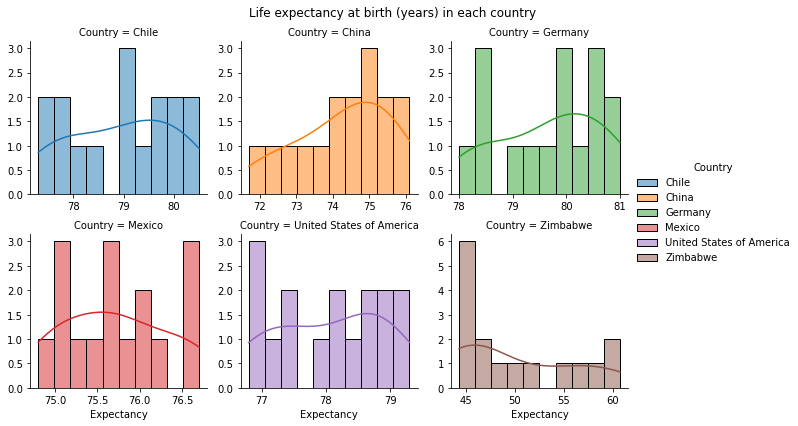

In [20]:


plt.clf()
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.histplot, "Expectancy", kde=True, bins=10)
         .add_legend())

graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life expectancy at birth (years) in each country')
plt.show()



The Zimbabwe's distribution is different from other countries.

<Figure size 432x288 with 0 Axes>

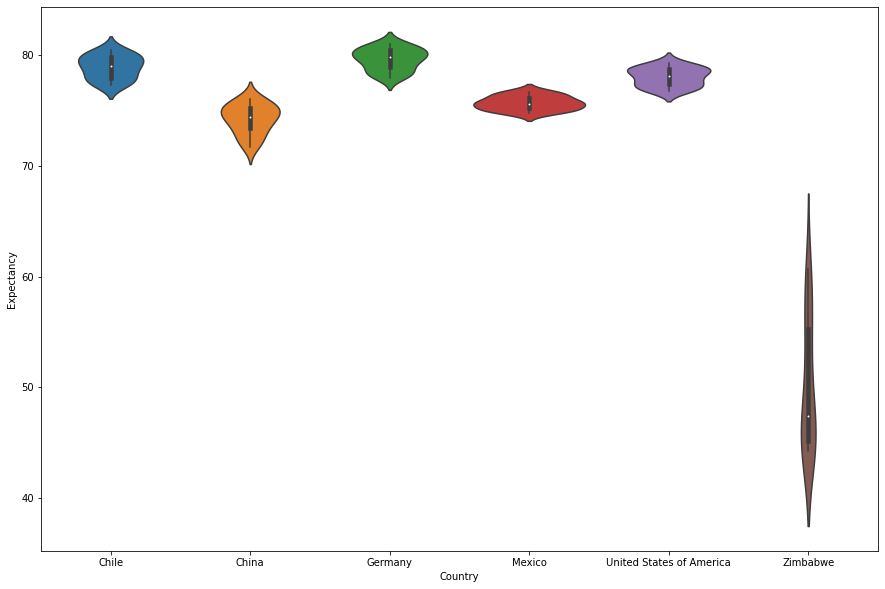

In [37]:
plt.clf()
fig = plt.figure(figsize=(15, 10))
sns.violinplot(data = all_data, x = "Country", y = "Expectancy")
plt.show()


c:\Users\ccana\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

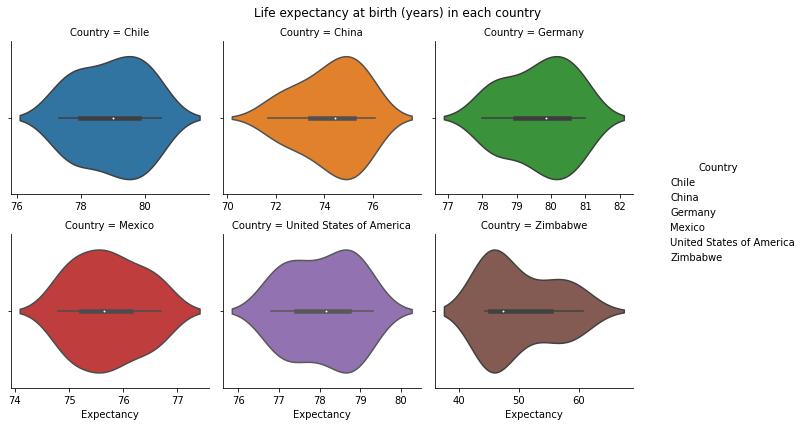

In [38]:


plt.clf()
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.violinplot,"Expectancy")
         .add_legend())

graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life expectancy at birth (years) in each country')
plt.show()



#Results

